In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [188]:
ev_global = pd.read_csv('/content/IEA Global EV Data 2024.csv')

In [189]:
ev_global.category.unique(), ev_global.parameter.unique(), ev_global.powertrain.unique(), ev_global['mode'].unique()

(array(['Historical', 'Projection-STEPS', 'Projection-APS'], dtype=object),
 array(['EV stock share', 'EV sales share', 'EV sales', 'EV stock',
        'EV charging points', 'Electricity demand', 'Oil displacement Mbd',
        'Oil displacement, million lge'], dtype=object),
 array(['EV', 'BEV', 'PHEV', 'Publicly available fast',
        'Publicly available slow', 'FCEV'], dtype=object),
 array(['Cars', 'EV', 'Buses', 'Vans', 'Trucks'], dtype=object))

In [190]:
ev_global_sales_share = ev_global[(ev_global.powertrain.isin(['EV', 'BEV', 'PHEV','FCEV'])) & (ev_global.category == 'Historical') & (ev_global.parameter == 'EV sales share')]
ev_global_stocks = ev_global[(ev_global.powertrain.isin(['EV', 'BEV', 'PHEV','FCEV'])) & (ev_global.category == 'Historical') & (ev_global.parameter == 'EV stock')]
ev_global_sales = ev_global[(ev_global.powertrain.isin(['EV', 'BEV', 'PHEV','FCEV'])) & (ev_global.category == 'Historical') & (ev_global.parameter == 'EV sales')]
ev_global_stocks_share = ev_global[(ev_global.powertrain.isin(['EV', 'BEV', 'PHEV','FCEV'])) & (ev_global.category == 'Historical') & (ev_global.parameter == 'EV stock share')]

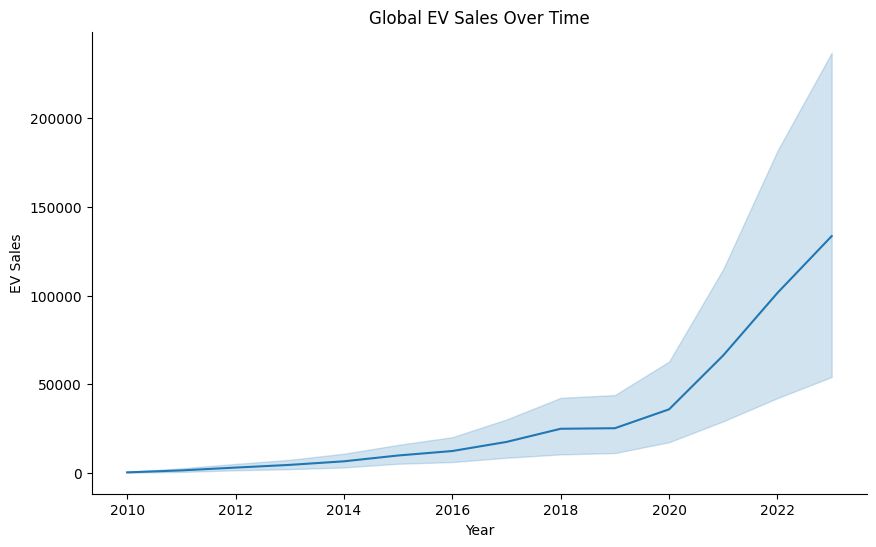

In [191]:
# 1. Simple line plot of 'EV sales' over 'Year'
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='value', data=ev_global_sales)
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.title('Global EV Sales Over Time')
plt.grid(False)
sns.despine()
plt.show()

In [192]:
# Get data for BEV and PHEV sales | FCEV, ensuring they have the same year
bev_sales = ev_global_sales[ev_global_sales.powertrain == 'BEV'][['year', 'value']].rename(columns={'value': 'bev_sales'})
phev_sales = ev_global_sales[ev_global_sales.powertrain == 'PHEV'][['year', 'value']].rename(columns={'value': 'phev_sales'})
fcev_sales = ev_global_sales[ev_global_sales.powertrain == 'FCEV'][['year', 'value']].rename(columns={'value': 'fcev_sales'})

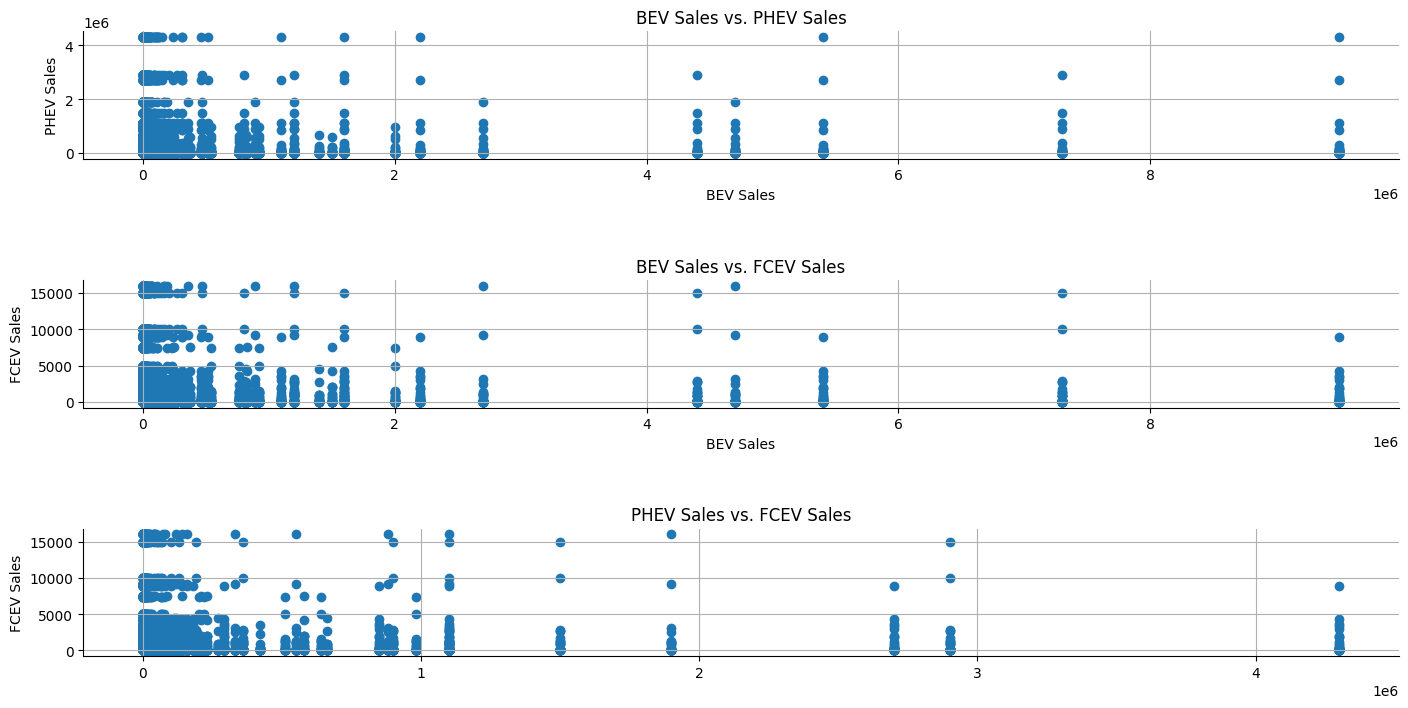

In [193]:
# 2. Scatter plot of 'EV sales' vs 'BEV sales'
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
# Merge the dataframes on 'year' to align the data
merged_sales = pd.merge(bev_sales, phev_sales, on='year', how='inner')
# Now create the scatter plot using the merged data
plt.scatter(merged_sales['bev_sales'], merged_sales['phev_sales'])
plt.xlabel('BEV Sales') # Changed label to reflect BEV sales
plt.ylabel('PHEV Sales') # Changed label to reflect PHEV sales
plt.title('BEV Sales vs. PHEV Sales') # Changed title to reflect BEV vs PHEV
plt.grid(None)
sns.despine()

plt.subplot(3, 1, 2)
# Merge the dataframes on 'year' to align the data
merged_sales = pd.merge(bev_sales, fcev_sales, on='year', how='inner')
# Now create the scatter plot using the merged data
plt.scatter(merged_sales['bev_sales'], merged_sales['fcev_sales'])
plt.xlabel('BEV Sales') # Changed label to reflect BEV sales
plt.ylabel('FCEV Sales') # Changed label to reflect FCEV sales
plt.title('BEV Sales vs. FCEV Sales') # Changed title to reflect BEV vs FCEV
plt.grid(None)
sns.despine()

plt.subplot(3, 1, 3)
# Merge the dataframes on 'year' to align the data
merged_sales = pd.merge(phev_sales, fcev_sales, on='year', how='inner')
# Now create the scatter plot using the merged data
plt.scatter(merged_sales['phev_sales'], merged_sales['fcev_sales'])
plt.xlabel
plt.ylabel('FCEV Sales') # Changed label to reflect FCEV sales
plt.title('PHEV Sales vs. FCEV Sales') # Changed title to reflect PHEV vs FCEV
plt.grid(None)
sns.despine()

plt.tight_layout(pad=4)
plt.show()

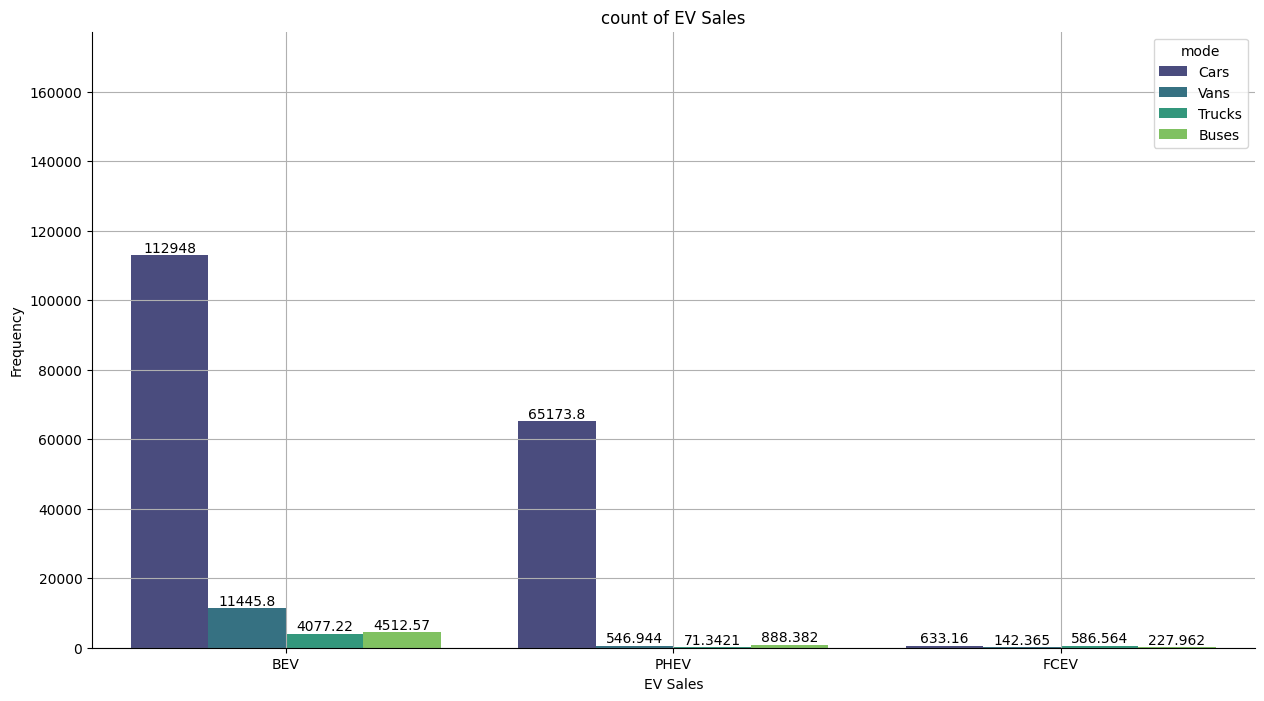

In [194]:
# 3. 'EV sales'
plt.figure(figsize=(15, 8))
ax=sns.barplot(data=ev_global_sales, x='powertrain', y='value',palette='viridis',hue='mode', errwidth=0)
for i in ax.containers:
  ax.bar_label(i,)
plt.xlabel('EV Sales')
plt.ylabel('Frequency')
plt.title('count of EV Sales')
plt.grid(None)
sns.despine()
plt.show()

In [195]:
# focus on the regions usa|eu27|china and world ; ev sales for bev|phev
region_ev_global = ev_global_sales[(ev_global_sales.region.isin(['USA', 'EU27', 'China','World'])) & (ev_global_sales.powertrain.isin(['BEV', 'PHEV']))]

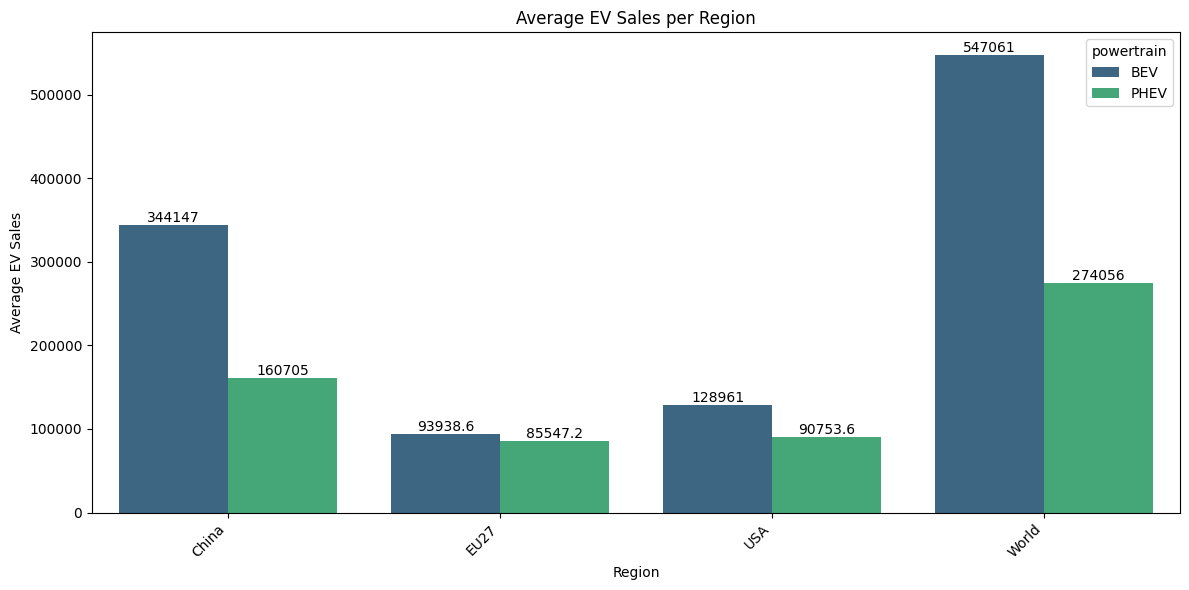

In [196]:
# 4. Bar plot of average 'EV sales' by 'Region'
ev_sales_by_region = region_ev_global.groupby(['region','powertrain'])['value'].mean().reset_index() # cobverts the series groupby to dataframe
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=ev_sales_by_region, x='region', y='value',palette='viridis',hue='powertrain', errwidth=0)
for i in ax.containers:
  ax.bar_label(i,)
plt.xlabel('Region')
plt.ylabel('Average EV Sales')
plt.title('Average EV Sales per Region')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

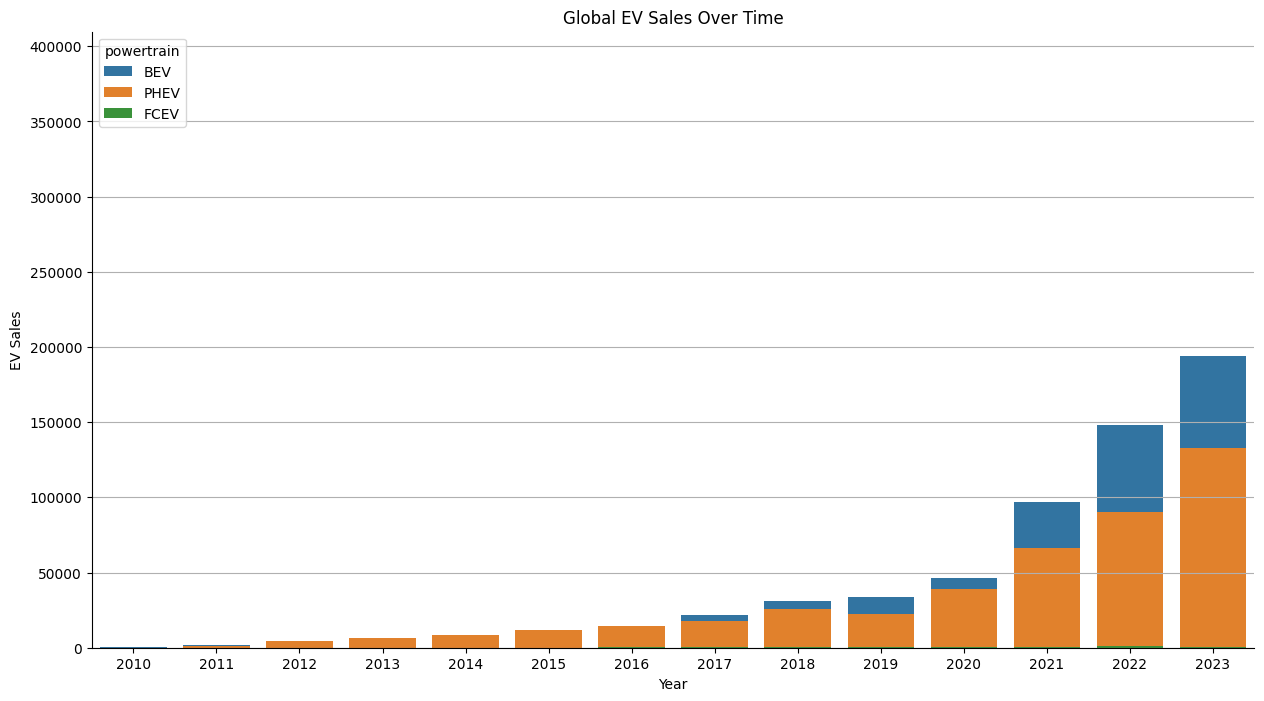

In [197]:
# global ev sales over time
plt.figure(figsize=(15, 8))
# Use seaborn's barplot to handle the 'hue' argument
sns.barplot(data=ev_global_sales, x='year', y='value', hue='powertrain', dodge=False, errwidth=0)  # Set dodge to False for stacked bars
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.title('Global EV Sales Over Time')
plt.grid(axis='y',linestyle='-')
sns.despine()
plt.show()

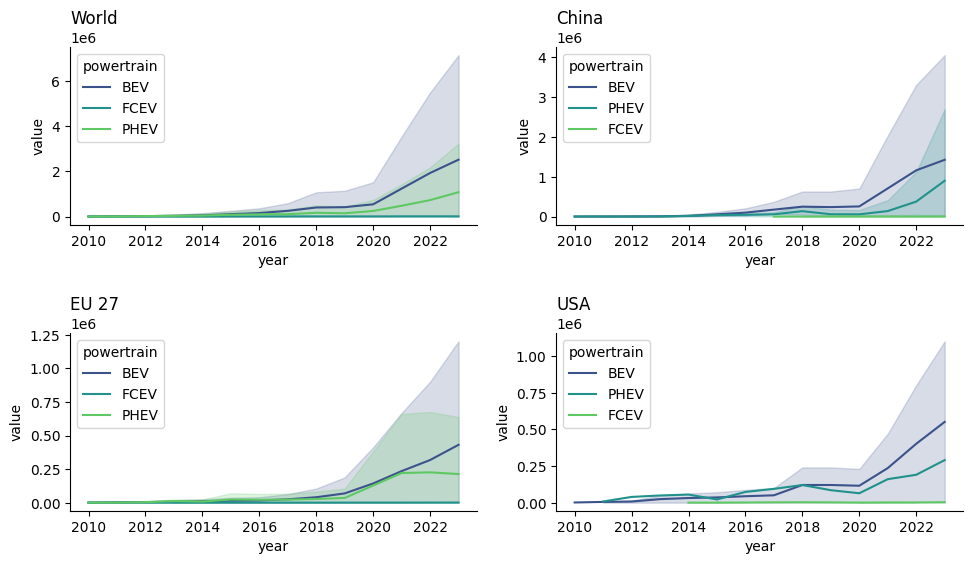

In [198]:
# ev sales over time
ev_global_time = ev_global_sales[(ev_global_sales.year >= 2010) & (ev_global_sales.year <= 2023)]
world_ev_global_time = ev_global_time[ev_global_time.region == 'World']
ch_ev_global_time = ev_global_time[ev_global_time.region == 'China']
eu_ev_global_time = ev_global_time[ev_global_time.region == 'EU27']
usa_ev_global_time = ev_global_time[ev_global_time.region =='USA']
uk_ev_global_time = ev_global_time[ev_global_time.region =='United Kingdom']
norway_ev_global_time = ev_global_time[ev_global_time.region =='Norway']
india_ev_global_time = ev_global_time[ev_global_time.region == 'India']
southAfica_ev_global_time = ev_global_time[ev_global_time.region == 'South Africa']

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.lineplot(data=world_ev_global_time, x='year', y='value', hue='powertrain', palette='viridis')
plt.title('World',loc='left')
plt.grid(False)
sns.despine()

plt.subplot(2, 2, 2)
sns.lineplot(data=ch_ev_global_time, x='year', y='value', hue='powertrain', palette='viridis')
plt.title('China',loc='left')
plt.grid(False)
sns.despine()

plt.subplot(2, 2, 3)
sns.lineplot(data=eu_ev_global_time, x='year', y='value', hue='powertrain', palette='viridis')
plt.title('EU 27',loc='left')
plt.grid(False)
sns.despine()

plt.subplot(2, 2, 4)
sns.lineplot(data=usa_ev_global_time, x='year', y='value', hue='powertrain', palette='viridis')
plt.title('USA',loc='left')
plt.grid(False)
sns.despine()

plt.tight_layout(pad=2)
plt.show()


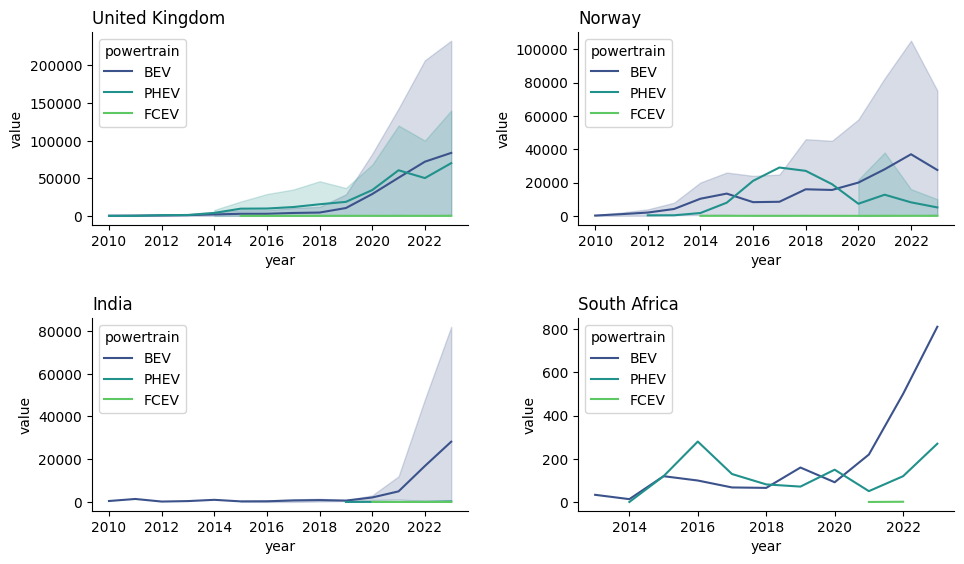

In [199]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.lineplot(data=uk_ev_global_time, x='year', y='value', hue='powertrain', palette='viridis')
plt.title('United Kingdom',loc='left')
plt.grid(False)
sns.despine()

plt.subplot(2, 2, 2)
sns.lineplot(data=norway_ev_global_time, x='year', y='value', hue='powertrain', palette='viridis')
plt.title('Norway',loc='left')
plt.grid(False)
sns.despine()

plt.subplot(2, 2, 3)
sns.lineplot(data=india_ev_global_time, x='year', y='value', hue='powertrain', palette='viridis')
plt.title('India',loc='left')
plt.grid(False)
sns.despine()

plt.subplot(2, 2, 4)
sns.lineplot(data=southAfica_ev_global_time, x='year', y='value', hue='powertrain', palette='viridis')
plt.title('South Africa',loc='left')
plt.grid(False)
sns.despine()

plt.tight_layout(pad=2)
plt.show()

In [200]:
# Create the choropleth map
fig = px.choropleth(ev_global_sales, locations="region", locationmode='country names',
                    color="value", hover_name="region",
                    animation_frame="year", animation_group="region",
                    range_color=[0, ev_global['value'].max()],
                    title="Global EV Sales Over Time",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()


In [201]:
# Create the choropleth map
fig = px.choropleth(ev_global_stocks, locations="region", locationmode='country names',
                    color="value", hover_name="region",
                    animation_frame="year", animation_group="region",
                    range_color=[0, ev_global['value'].max()],
                    title="Global EV Stocks Over Time",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()


In [202]:
# EV Sales shares of over time from 2010 to 2023
# EV Stock shares over time from 2010 to 2023
plt.figure(figsize=(15, 8))
region_ev_global_sales_share = ev_global_sales_share[(ev_global_sales_share.year >= 2010) & (ev_global_sales_share.year <= 2023) &
                ev_global_sales_share.region.isin(['World', 'China', 'EU27', 'USA', 'United Kingdom', 'Norway', 'India', 'South Africa'])]

region_ev_global_stocks_share = ev_global_stocks_share[(ev_global_stocks_share.year >= 2010) & (ev_global_stocks_share.year <= 2023) &
                ev_global_stocks_share.region.isin(['World', 'China', 'EU27', 'USA', 'United Kingdom', 'Norway', 'India', 'South Africa'])]

# grouby region and year the value of ev sales
region_ev_global_sales_share = region_ev_global_sales_share.groupby(['region','year'])['value'].mean().reset_index()
region_ev_global_stocks_share = region_ev_global_stocks_share.groupby(['region','year'])['value'].mean().reset_index()


<Figure size 1500x800 with 0 Axes>

In [203]:
#plots
fix = px.line(region_ev_global_sales_share, x='year', y='value', color='region', title='EV Sales Share Over Time')

fix.show()

In [204]:
fix = px.line(region_ev_global_stocks_share, x='year', y='value', color='region', title='EV Stocks Share Over Time')
fix.show()